# Loading Dataset

In [5]:
# 1. **age**: This refers to the age of the patient, typically measured in years. Age is an important factor in heart health, as certain heart conditions and risks are more common at different stages of life.

# 2. **sex**: This indicates the biological sex of the patient, typically encoded as binary values (0 or 1) where 0 represents female and 1 represents male. Sex is a significant factor in heart disease, as certain conditions may be more prevalent or present differently in different sexes.

# 3. **cp**: This stands for "chest pain type." It represents the type of chest pain the patient is experiencing and is categorized into four levels:
#    - 0: Typical angina (chest pain related to reduced blood flow to the heart muscle)
#    - 1: Atypical angina
#    - 2: Non-anginal pain
#    - 3: Asymptomatic

# 4. **trestbps**: This is the resting blood pressure of the patient, measured in mmHg (millimeters of mercury). Blood pressure is an essential indicator of heart health, as high blood pressure (hypertension) can strain the heart and blood vessels.

# 5. **chol**: This represents the serum cholesterol level of the patient, measured in mg/dL (milligrams per deciliter). Cholesterol is a type of fat in the blood, and high cholesterol levels can contribute to the formation of plaque in the arteries, increasing the risk of heart disease.

# 6. **fbs**: Fasting blood sugar level, measured in mg/dL. This indicates the patient's blood glucose level after fasting for a specific duration. Elevated fasting blood sugar may be associated with diabetes, which is a risk factor for heart disease.

# 7. **restecg**: This stands for "resting electrocardiographic results." It represents the results of an electrocardiogram (ECG or EKG) performed while the patient is at rest. It may be encoded into several levels, indicating different ECG patterns.

# 8. **thalach**: This refers to the maximum heart rate achieved by the patient during an exercise test, measured in beats per minute (bpm). The maximum heart rate is an important parameter during exercise stress testing and can provide insights into the patient's cardiovascular fitness.

# 9. **exang**: This is short for "exercise-induced angina" and is binary (0 or 1) data. It indicates whether the patient experiences chest pain (angina) during exercise (1) or not (0).

# 10. **oldpeak**: This represents the ST depression induced by exercise relative to rest. It is a measurement on an ECG and helps assess the severity of exercise-related changes in the heart's electrical activity.

# 11. **slope**: This refers to the slope of the peak exercise ST segment, also measured on an ECG. It provides information about the ST segment's trajectory during exercise and can be categorized into three levels.

# 12. **ca**: This stands for the number of major vessels colored by fluoroscopy. It represents the number of blood vessels in the heart that were visualized during a diagnostic test.

# 13. **target**: This is the target attribute or the label, which indicates the presence (1) or absence (0) of heart disease in the patient. It is the variable that the model aims to predict based on the other attributes in the dataset.



In [6]:
import pandas as pd
# from google.colab import drive
# drive.mount('/content/drive')

# dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Intellipaat/Weekend_ML_Batch/Logistic_NB/Logistic_Regression/heart1.csv")

dataset = pd.read_csv(r'D:\intellipaat ds ai ml\DS@AI\ml\05-04 customer churn assignment\Logistic_Regression\heart1.csv')
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,0


In [7]:
dataset.target.value_counts(normalize=True)*100   # dataset['target'].value_counts(normalize = True) *100

#normalize provides the proportion of each data

target
1    54.455446
0    45.544554
Name: proportion, dtype: float64

In [8]:
print(dataset.shape)

(303, 13)


# Data Exploration

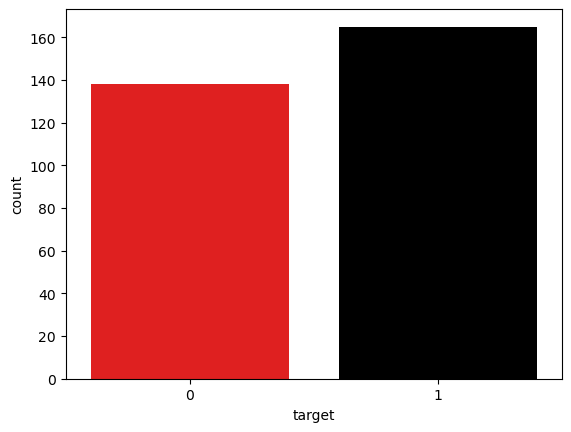

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x= 'target',data = dataset,palette=['red','black'])
plt.show()

In [10]:
dataset.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,-0.430696


<Axes: >

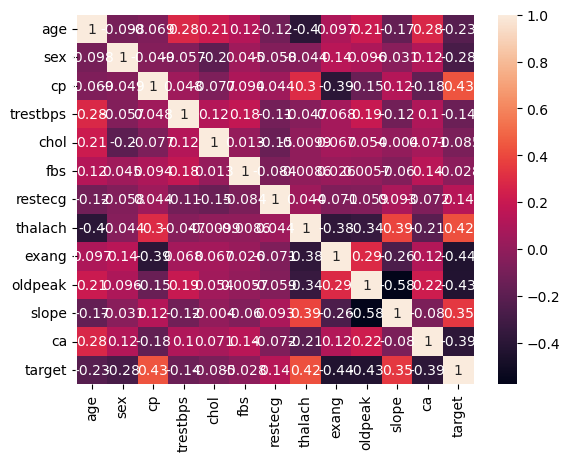

In [11]:
sns.heatmap(dataset.corr(),annot=True) # annot display the corr value in heatmap

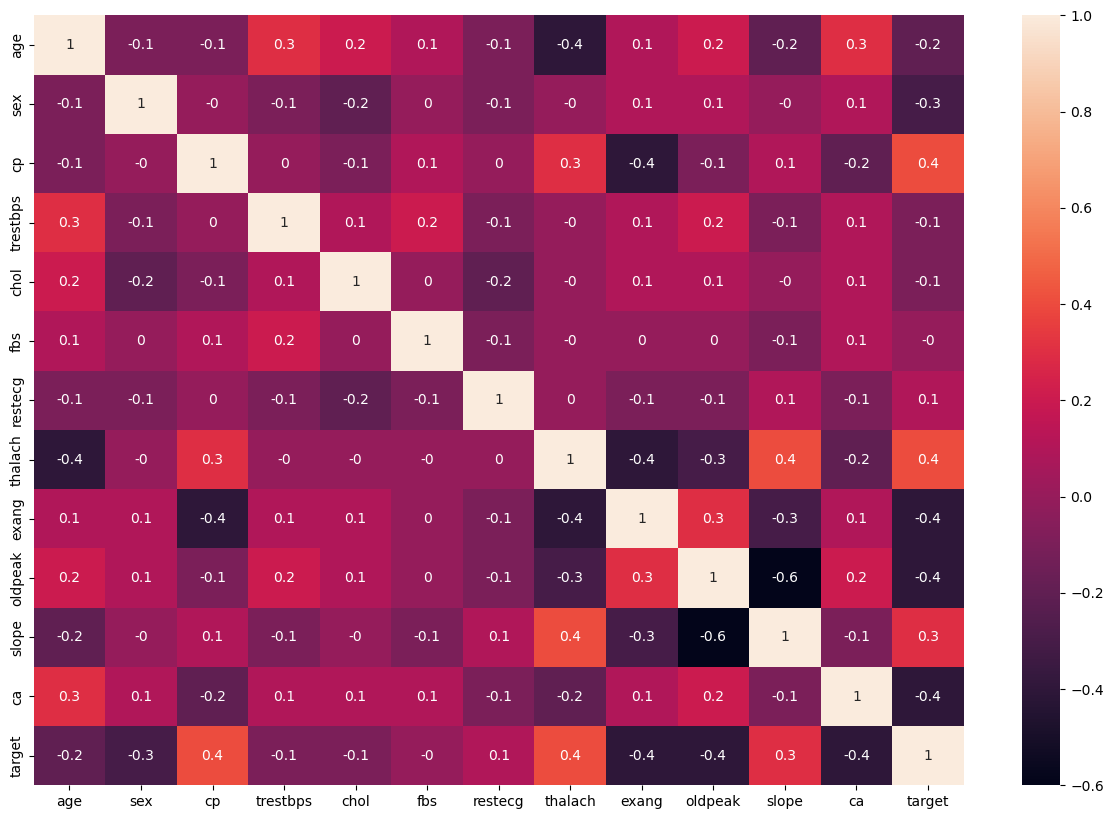

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr().round(1),annot = True)   #round -- rounds off decimal
plt.show()

#can give prompt and generate code in colab

In [13]:
dataset.corr()['target']

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
target      1.000000
Name: target, dtype: float64

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  target    303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


In [15]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


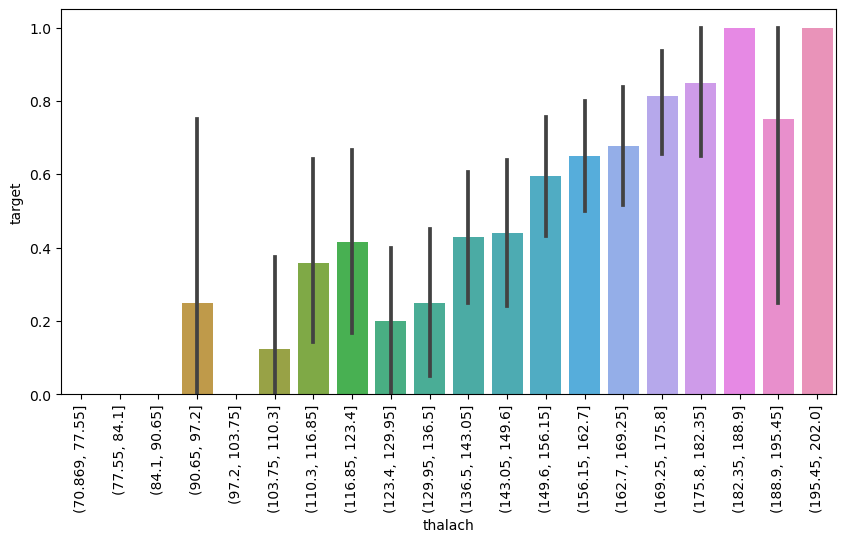

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(x=pd.cut(dataset['thalach'], bins= 20), y = 'target', data = dataset)
plt.xticks(rotation= 90) # to rotate the values of axis ..yticks for y-axis
plt.show()


# vertical bar represents avg target variable % for the respective bin
# vertical line gives frequency variation of given bin like less/ more patients in the bin

# Split the data into features (X) and target (y) label sets

In [17]:
X = pd.DataFrame(dataset.iloc[:,:-1])
y = pd.DataFrame(dataset.iloc[:,-1])

In [18]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
0,63,1,3,145,233,1,0,150,0,2.3,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2
301,57,1,0,130,131,0,1,115,1,1.2,1,1


In [19]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


# Split the data into a training and test set

In [20]:
# Import module to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [21]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
95,53,1,0,142,226,0,0,111,1,0.0,2,0
44,39,1,2,140,321,0,0,182,0,0.0,2,0
257,50,1,0,144,200,0,0,126,1,0.9,1,0
270,46,1,0,120,249,0,0,144,0,0.8,2,0
243,57,1,0,152,274,0,1,88,1,1.2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
161,55,0,1,132,342,0,1,166,0,1.2,2,0
269,56,1,0,130,283,1,0,103,1,1.6,0,0
91,57,1,0,132,207,0,1,168,1,0.0,2,0
80,41,1,2,112,250,0,1,179,0,0.0,2,0


In [22]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
207,60,0,0,150,258,0,0,157,0,2.6,1,2
12,49,1,1,130,266,0,1,171,0,0.6,2,0
282,59,1,2,126,218,1,1,134,0,2.2,1,1
297,59,1,0,164,176,1,0,90,0,1.0,1,2
60,71,0,2,110,265,1,0,130,0,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
258,62,0,0,150,244,0,1,154,1,1.4,1,0
240,70,1,2,160,269,0,1,112,1,2.9,1,1
70,54,1,2,120,258,0,0,147,0,0.4,1,0
126,47,1,0,112,204,0,1,143,0,0.1,2,0


# Create and Train the Model

In [23]:
# Import module for fitting
from sklearn.linear_model import LogisticRegression

# Create instance (i.e. object) of LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Predicting the test set results

In [24]:
y_pred = logmodel.predict(X_test)    #when using predict function, default cut off is 0.5

In [25]:
len(y_pred)

61

In [26]:
y_test

,target
207,0
12,1
282,0
297,0
60,1
...,...
258,0
240,0
70,1
126,1


# Calculating the accuracy

In [27]:
print('Accuracy:', (logmodel.score(X_train, y_train)))

#  score() method--- computes the accuracy of the model’s predictions compared to the actual target labels

Accuracy: 0.8429752066115702


In [28]:
# or
# score = logmodel.score(X_train, y_train)
# print(f'accuracy:{score}')

# or

# print('accuracy:%f' %(lr.score(x_test,y_test)))     ## %  calls the value


# check another type     accuracy_score()

In [29]:
print('Accuracy: %d', (logmodel.score(X_test, y_test)))

Accuracy: %d 0.8360655737704918


# Evaluate model using Confusion Matrix

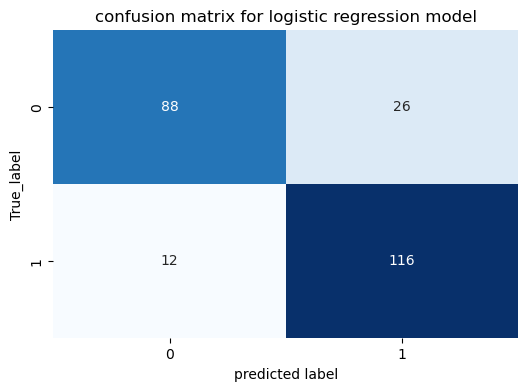

In [30]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_train, logmodel.predict(X_train))  #check sequence to pass
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix, annot = True, fmt = 'd',cmap = 'Blues', cbar = False)
#check different format options in sns heatmap
plt.xlabel('predicted label')
plt.ylabel('True_label')
plt.title('confusion matrix for logistic regression model')
plt.show()
# print(confusion_matrix)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_train, logmodel.predict(X_train)))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       114
           1       0.82      0.91      0.86       128

    accuracy                           0.84       242
   macro avg       0.85      0.84      0.84       242
weighted avg       0.85      0.84      0.84       242



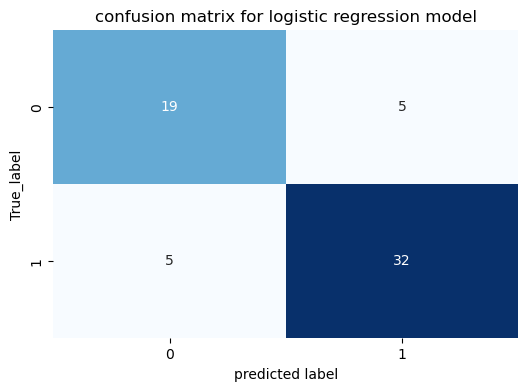

[[19  5]
 [ 5 32]]


In [32]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, logmodel.predict(X_test))
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix, annot = True, fmt = 'd',cmap = 'Blues', cbar = False)
plt.xlabel('predicted label')
plt.ylabel('True_label')
plt.title('confusion matrix for logistic regression model')
plt.show()
print(confusion_matrix)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        24
           1       0.86      0.86      0.86        37

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



to increase the recall of model, change cutoff values
predict function has default cutoff as  .5

In [34]:
import matplotlib.pyplot as plt
y_pred_proba= logmodel.predict_proba(X_test)
y_pred_proba
# need info on what inference we get from model finally, if model not good what should be the next step
# we are taking random split and how each individual is having heart attack or not
# array -- 0 and then 1(probability of getting heart attack)                                 

array([[0.85928937, 0.14071063],
       [0.17441075, 0.82558925],
       [0.58098066, 0.41901934],
       [0.98855384, 0.01144616],
       [0.07710229, 0.92289771],
       [0.10971772, 0.89028228],
       [0.46233407, 0.53766593],
       [0.04860033, 0.95139967],
       [0.67386397, 0.32613603],
       [0.09953388, 0.90046612],
       [0.60173145, 0.39826855],
       [0.64657394, 0.35342606],
       [0.98583025, 0.01416975],
       [0.1088027 , 0.8911973 ],
       [0.84599507, 0.15400493],
       [0.971233  , 0.028767  ],
       [0.03122612, 0.96877388],
       [0.00721222, 0.99278778],
       [0.30059536, 0.69940464],
       [0.64071035, 0.35928965],
       [0.0144544 , 0.9855456 ],
       [0.92958879, 0.07041121],
       [0.99137768, 0.00862232],
       [0.04207949, 0.95792051],
       [0.04237966, 0.95762034],
       [0.42305784, 0.57694216],
       [0.45815708, 0.54184292],
       [0.03396873, 0.96603127],
       [0.02728625, 0.97271375],
       [0.99237791, 0.00762209],
       [0.

In [35]:
y_pred_new= (y_pred_proba[:,1] >= .4).astype(int)
y_pred_new

#change the cutoff value for appropriate results. when cutoff changes FP , FN also changes

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1])

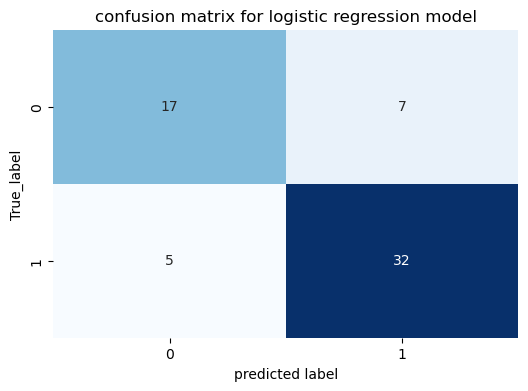

[[17  7]
 [ 5 32]]


In [36]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred_new)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix, annot = True, fmt = 'd',cmap = 'Blues', cbar = False)
plt.xlabel('predicted label')
plt.ylabel('True_label')
plt.title('confusion matrix for logistic regression model')
plt.show()
print(confusion_matrix)

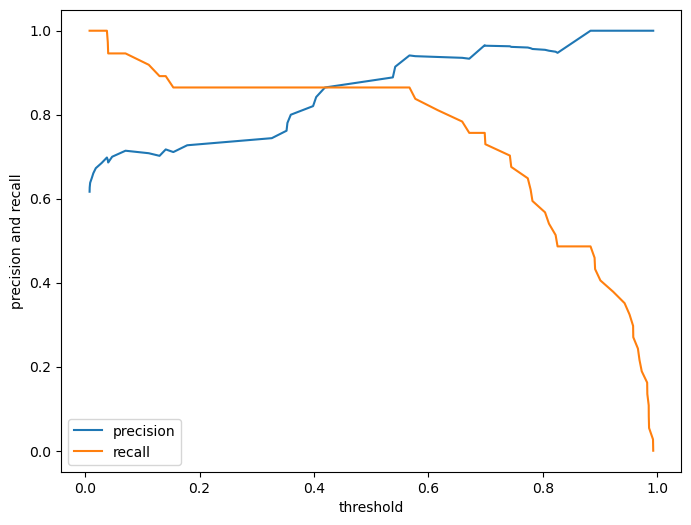

In [37]:
# precision recall curve
from sklearn.metrics import precision_recall_curve

# get predicted probabilities for test set
y_pred_proba = logmodel.predict_proba(X_test)[:,1]

# calculate precision and recall values
precision, recall, thresholds= precision_recall_curve(y_test, y_pred_proba)

# plot the precision and recall curve
plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[1:],label = 'precision')
plt.plot(thresholds, recall[1:],label = 'recall')

# Add legends and label
plt.legend()
plt.xlabel('threshold')
plt.ylabel('precision and recall')
plt.show()

# if we take for 100 % recall , precision is low